In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [3]:
from scipy import convolve as cv

In [77]:
def arr_to_xy(arr):
    x = []
    y = []
    
    for i, ai in enumerate(arr):
        x.append(i)
        y.append(ai)
        x.append(i+1)
        y.append(ai)
    return x,y

def plot(arr):
    x,y = arr_to_xy(arr)
    plt.plot(x, y)
    
def plot2(f, iarr, oarr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 3))
    
    ax[0].set_title('filter')
    x,y = arr_to_xy(f)
    x = [x[0]]+x+[x[-1]]
    y = [0]+y+[0]
    ax[0].plot(x, y)
    
    ax[1].set_title('data')

    x,y = arr_to_xy(iarr)
    ax[1].plot(x, y, label='input', alpha=0.7)
    x,y = arr_to_xy(oarr)
    ax[1].plot(x, y, label='convolved', alpha=0.7)
    ax[1].legend()
    
def plot_conv(f, a, s=1.):
    f = np.array(f) * s
    a1 = np.convolve(a, f, mode='same')
    plot2(f, a, a1)

In [78]:
a = np.zeros((27))
a[13] = 1

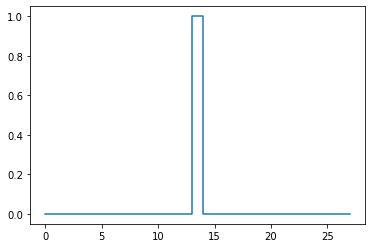

In [79]:
plot(a)

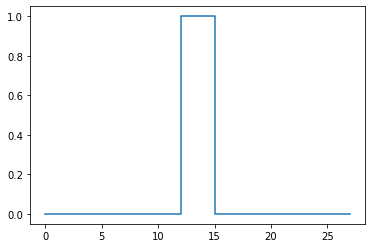

In [80]:
f1 = np.zeros(3); f1[:]=1
a1 = np.convolve(a, f1, mode='same')
plot(a1)

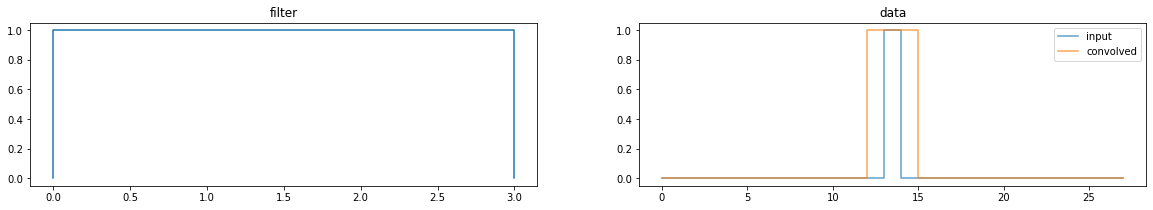

In [81]:
plot2(f1, a, a1)

## plot generation:

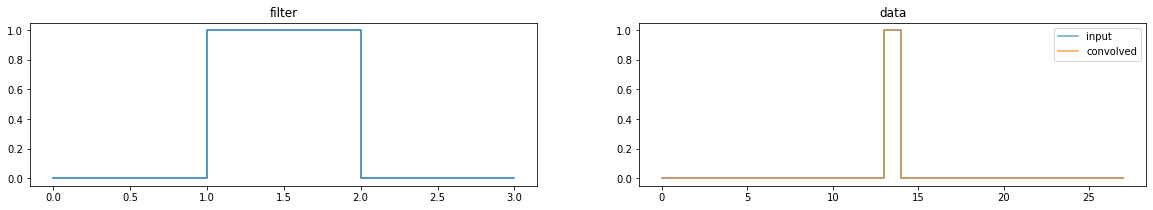

In [82]:
plot_conv([0,1,0], a)

     - [0001000] - identity
     - [0000.500]  -scale
     - [0010000] - shift
     - [0011000] = [0001000] + [0010000]
     - motion blur, gaussian, dg ddg

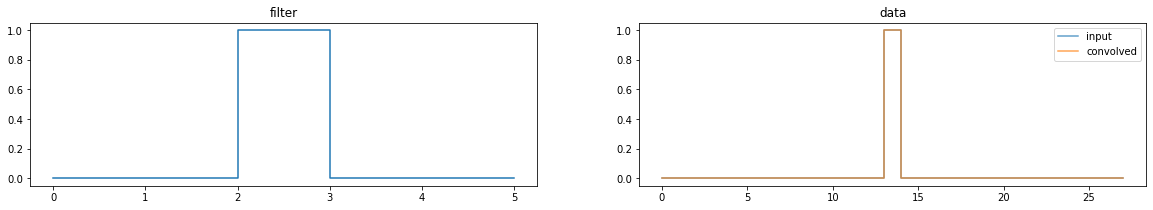

In [83]:
plot_conv([0,0,1,0,0], a)

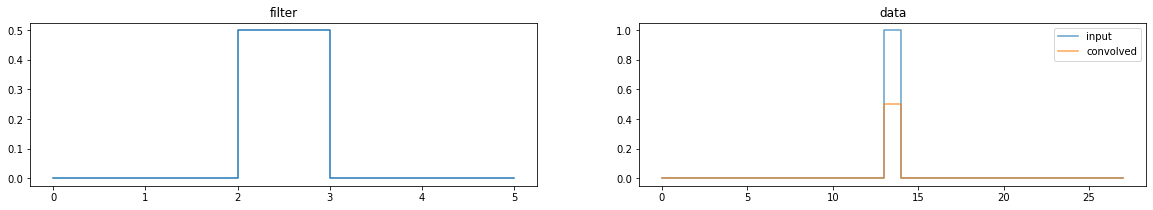

In [84]:
plot_conv([0,0,0.5,0,0], a)

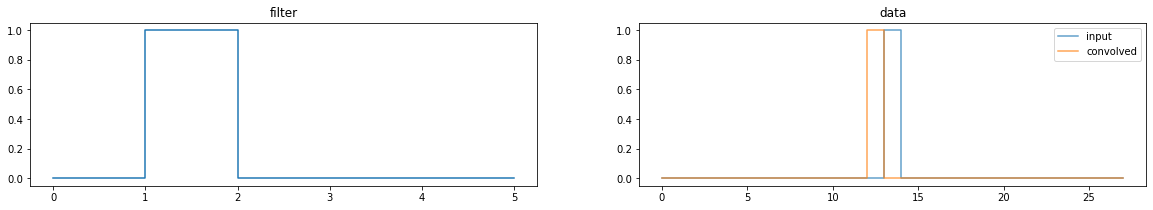

In [85]:
plot_conv([0,1,0,0,0], a)

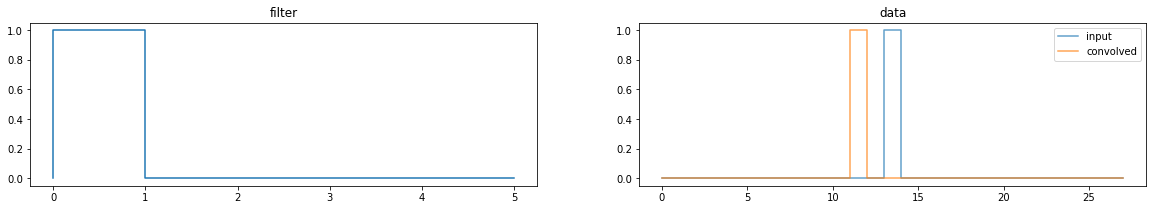

In [86]:
plot_conv([1,0,0,0,0], a)

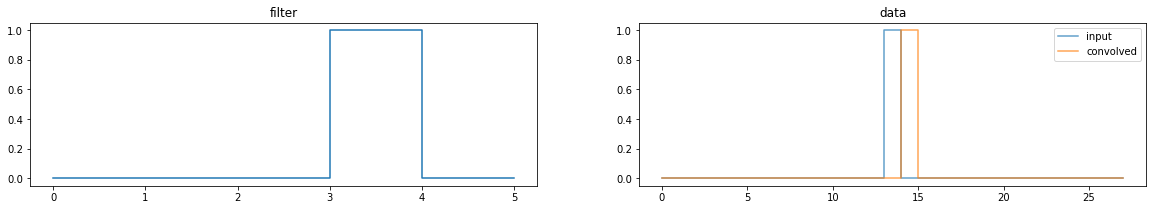

In [87]:
plot_conv([0,0,0,1,0], a)

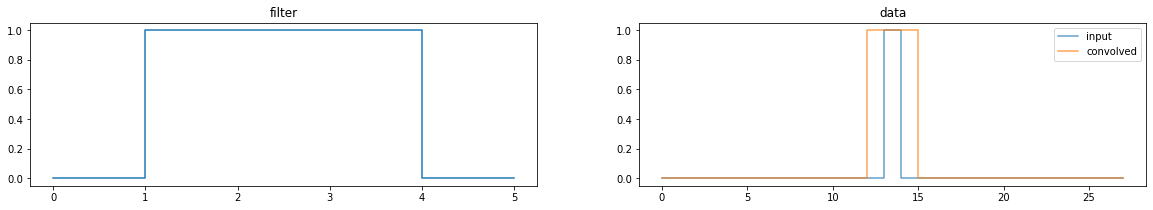

In [88]:
plot_conv([0,1,1,1,0], a)

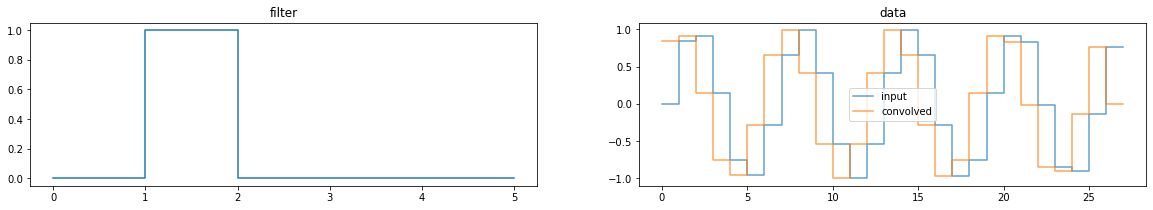

In [89]:
plot_conv([0,1,0,0,0], np.sin(np.arange(len(a))))

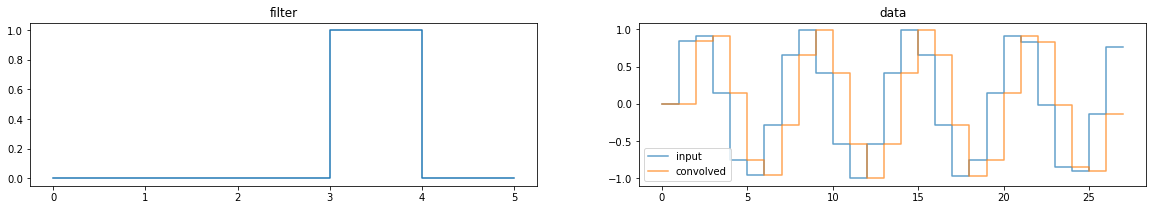

In [90]:
plot_conv([0,0,0,1,0], np.sin(np.arange(len(a))))

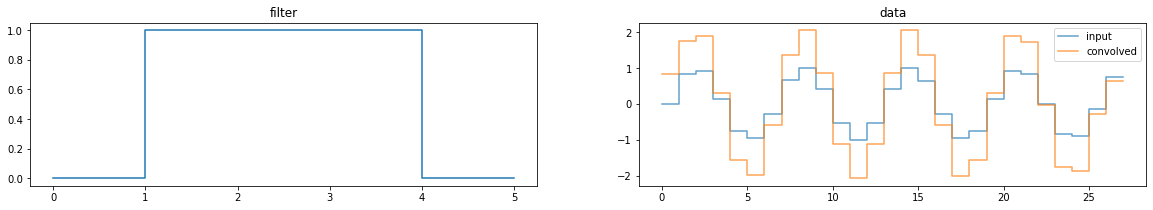

In [91]:
plot_conv([0,1,1,1,0], np.sin(np.arange(len(a))))

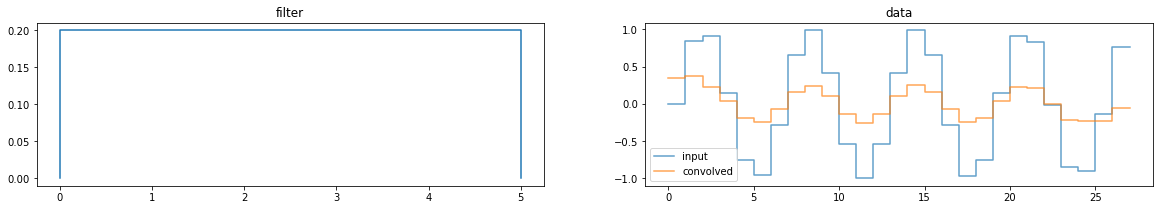

In [92]:
plot_conv([1,1,1,1,1], np.sin(np.arange(len(a))), 1/5)

In [93]:
def gaussian(n=5):
    x = np.linspace(-3, 3, n)
    y = np.exp(-x**2 * 0.5) / np.sqrt(2*np.pi)
    return y

def dgaussian(n=5):
    x = np.linspace(-3, 3, n)
    y = - 2 * x * np.exp(-x**2 * 0.5) / np.sqrt(2*np.pi)
    return y

def ddgaussian(n=5):
    x = np.linspace(-3, 3, n)
    y = - 2 * (2*x**2 - 1) * np.exp(-x**2 * 0.5) / np.sqrt(2*np.pi)
    return y

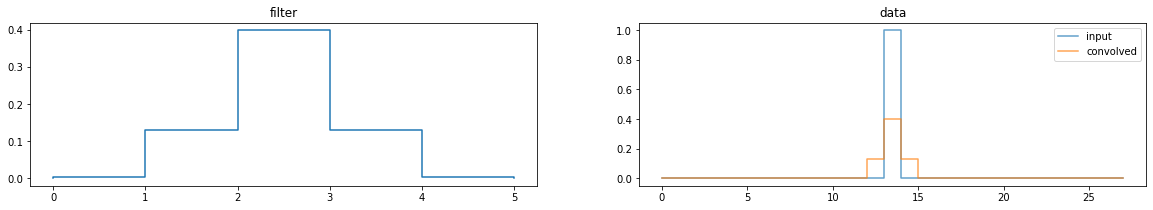

In [94]:
plot_conv(gaussian(n=5), a)

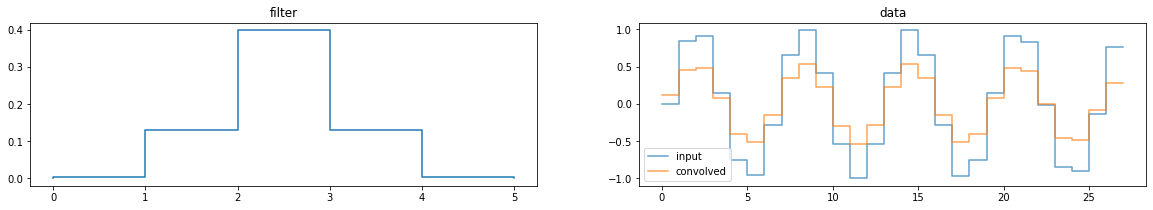

In [95]:
plot_conv(gaussian(n=5), np.sin(np.arange(len(a))))

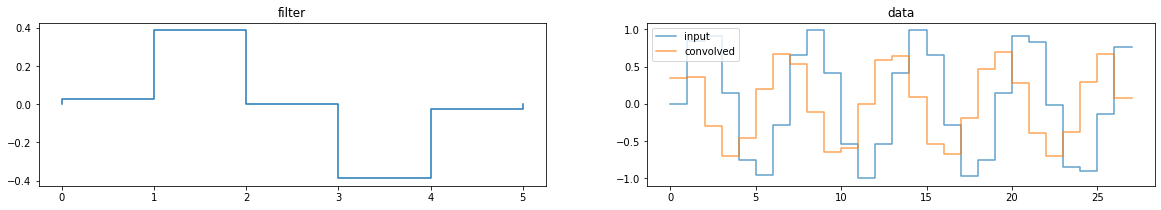

In [96]:
plot_conv(dgaussian(n=5), np.sin(np.arange(len(a))))

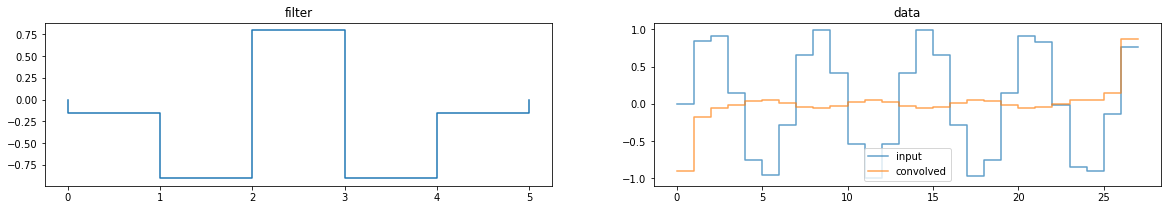

In [97]:
plot_conv(ddgaussian(n=5), np.sin(np.arange(len(a))))

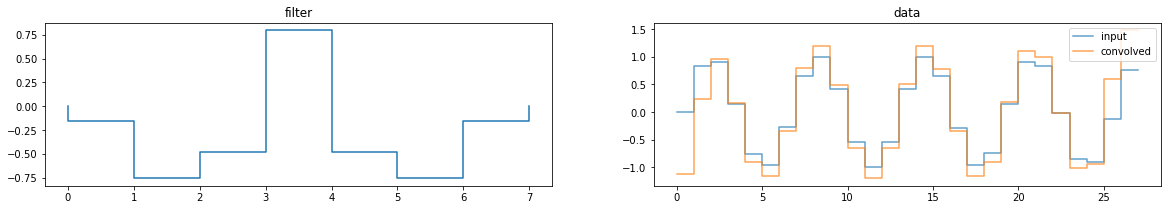

In [98]:
plot_conv(ddgaussian(n=7), np.sin(np.arange(len(a))))

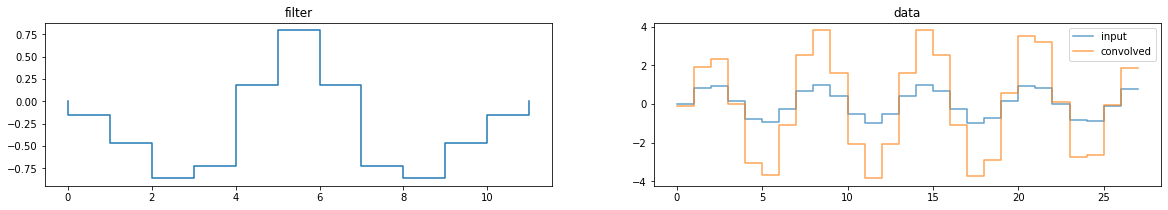

In [99]:
plot_conv(ddgaussian(n=11), np.sin(np.arange(len(a))))

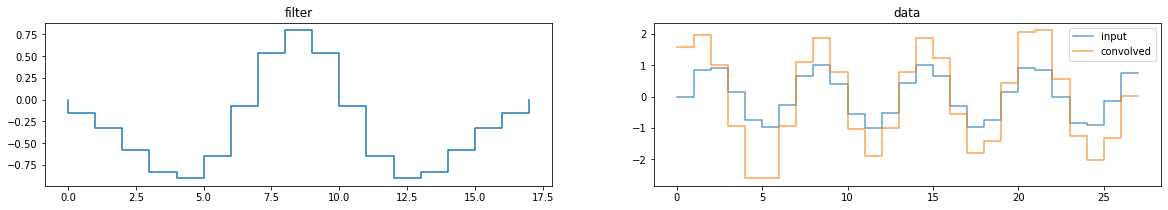

In [100]:
plot_conv(ddgaussian(n=17), np.sin(np.arange(len(a))))

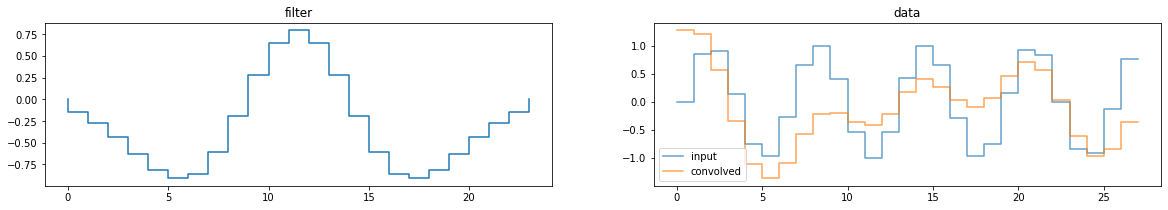

In [103]:
plot_conv(ddgaussian(n=23), np.sin(np.arange(len(a))))

In [110]:
f0 = np.array([0.2, 0.6, 0.2])
a0 = np.arange(-1, 8, 1)
a0[:2] = 0
a0[-2:] = 0
a0

array([0, 0, 1, 2, 3, 4, 5, 0, 0])

In [113]:
for i in range(10):
    ai = a0[i:i+3]
    if len(ai)!=3:
        break
    b0 = ai * f0
    
    print(ai)
    print(b0)
    print(b0.sum(), '\n')

[0 0 1]
[0.  0.  0.2]
0.2 

[0 1 2]
[0.  0.6 0.4]
1.0 

[1 2 3]
[0.2 1.2 0.6]
2.0 

[2 3 4]
[0.4 1.8 0.8]
3.0 

[3 4 5]
[0.6 2.4 1. ]
4.0 

[4 5 0]
[0.8 3.  0. ]
3.8 

[5 0 0]
[1. 0. 0.]
1.0 



In [116]:
f1 = np.array([0.2, 0, 0.6, 0, 0.2])
for i in range(10):
    ai = a0[i:i+5]
    if len(ai)!=5:
        break
    b0 = ai * f1
    
    print(ai)
    print(b0)
    print(b0.sum(), '\n')

[0 0 1 2 3]
[0.  0.  0.6 0.  0.6]
1.2000000000000002 

[0 1 2 3 4]
[0.  0.  1.2 0.  0.8]
2.0 

[1 2 3 4 5]
[0.2 0.  1.8 0.  1. ]
3.0 

[2 3 4 5 0]
[0.4 0.  2.4 0.  0. ]
2.8 

[3 4 5 0 0]
[0.6 0.  3.  0.  0. ]
3.6 



In [117]:
a0

array([0, 0, 1, 2, 3, 4, 5, 0, 0])

In [119]:
a1 = [0,1,0,2,0,3,0,4,0,5,0,0]
for i in range(15):
    ai = a1[i:i+3]
    if len(ai)!=3:
        break
    b0 = ai * f0
    
    print(ai)
    print(b0)
    print(b0.sum(), '\n')

[0, 1, 0]
[0.  0.6 0. ]
0.6 

[1, 0, 2]
[0.2 0.  0.4]
0.6000000000000001 

[0, 2, 0]
[0.  1.2 0. ]
1.2 

[2, 0, 3]
[0.4 0.  0.6]
1.0 

[0, 3, 0]
[0.  1.8 0. ]
1.7999999999999998 

[3, 0, 4]
[0.6 0.  0.8]
1.4000000000000001 

[0, 4, 0]
[0.  2.4 0. ]
2.4 

[4, 0, 5]
[0.8 0.  1. ]
1.8 

[0, 5, 0]
[0. 3. 0.]
3.0 

[5, 0, 0]
[1. 0. 0.]
1.0 

